In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Connected Vehicles UWE Dataset.xlsx', index_col=0)
dataset.head()

,FUEL TYPE,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP START,TRIP END,TRIP LENGTH MINUTES
VEHICLE IDENTIFICATION OTONOMO ID,,,,,,,,,,
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95903,54.95903,-1.74675,-1.74670,12.353081,32.870536,2022-01-01 05:52:00,2022-01-01 06:02:00,10.0
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95903,54.95904,-1.74670,-1.74668,12.783539,32.789758,2022-01-02 05:45:00,2022-01-02 05:54:00,9.0
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95904,54.95905,-1.74668,-1.74668,9.964760,30.565249,2022-01-03 05:37:00,2022-01-03 05:46:00,9.0
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95905,54.95900,-1.74668,-1.74672,6.608753,28.483655,2022-01-03 12:27:00,2022-01-03 12:44:00,17.0
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95900,54.95893,-1.74672,-1.74670,28.475833,57.576255,2022-01-03 13:25:00,2022-01-03 13:53:00,28.0


In [5]:
# dataset['FUEL TYPE '] = dataset['FUEL TYPE '].replace({'ICE': 1, 'EV': 2, 'Hybrid': 3})
dataset = dataset.drop(['TRIP START', 'TRIP END'], axis=1)

In [6]:
# import math
lat_rad, lon_rad = np.radians(dataset['LOCATION LAT START']), np.radians(dataset['LOCATION LONG START'])
long_diff = lon_rad - np.radians(dataset['LOCATION LONG END'])
lat_diff = lat_rad - np.radians(dataset['LOCATION LAT END'])
dataset['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(lat_diff/2)**2 + np.cos(np.radians(dataset['LOCATION LAT END'])) * np.cos(lat_rad) * np.sin(long_diff/2)**2))


In [7]:
dataset.head()

,FUEL TYPE,LOCATION LAT START,LOCATION LAT END,LOCATION LONG START,LOCATION LONG END,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP LENGTH MINUTES,distance
VEHICLE IDENTIFICATION OTONOMO ID,,,,,,,,,
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95903,54.95903,-1.74675,-1.74670,12.353081,32.870536,10.0,0.003190
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95903,54.95904,-1.74670,-1.74668,12.783539,32.789758,9.0,0.001692
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95904,54.95905,-1.74668,-1.74668,9.964760,30.565249,9.0,0.001111
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95905,54.95900,-1.74668,-1.74672,6.608753,28.483655,17.0,0.006114
003217527c9a5ad89e8bb00374ee9d37,ICE,54.95900,54.95893,-1.74672,-1.74670,28.475833,57.576255,28.0,0.007883


In [8]:
dataset=dataset.drop(['LOCATION LAT END', 'LOCATION LONG END', 'LOCATION LAT START', 'LOCATION LONG START'], axis=1)

In [9]:
# dataset.distance = dataset.distance * 1000
dataset = dataset.dropna()
dataset.head()

,FUEL TYPE,MOBILITY SPEED AVERAGE,MOBILITY SPEEDMAXIMUM,TRIP LENGTH MINUTES,distance
VEHICLE IDENTIFICATION OTONOMO ID,,,,,
003217527c9a5ad89e8bb00374ee9d37,ICE,12.353081,32.870536,10.0,0.003190
003217527c9a5ad89e8bb00374ee9d37,ICE,12.783539,32.789758,9.0,0.001692
003217527c9a5ad89e8bb00374ee9d37,ICE,9.964760,30.565249,9.0,0.001111
003217527c9a5ad89e8bb00374ee9d37,ICE,6.608753,28.483655,17.0,0.006114
003217527c9a5ad89e8bb00374ee9d37,ICE,28.475833,57.576255,28.0,0.007883


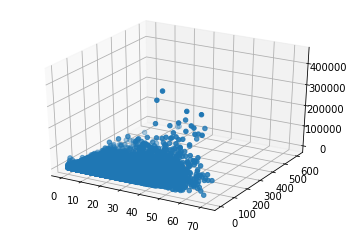

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset['MOBILITY SPEED AVERAGE'], dataset['TRIP LENGTH MINUTES'], dataset['distance'])
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [12]:
kmeans_kwargs = {
      "init": "random",
      "n_init": 10,
      "max_iter": 300,
      "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dataset[['MOBILITY SPEED AVERAGE', 'distance', 'MOBILITY SPEEDMAXIMUM', 'TRIP LENGTH MINUTES']])    
    sse.append(kmeans.inertia_)

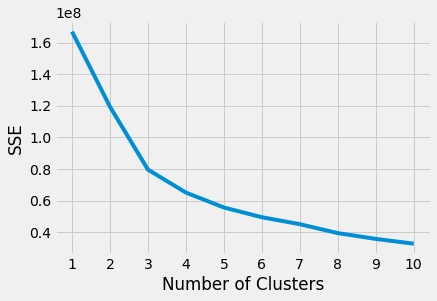

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [14]:
!pip install kneed

In [15]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [17]:
# clustering 
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset[['MOBILITY SPEED AVERAGE', 'distance', 'MOBILITY SPEEDMAXIMUM', 'TRIP LENGTH MINUTES']])

KMeans(n_clusters=3)

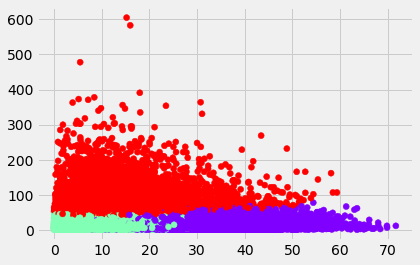

In [21]:
plt.scatter(dataset['MOBILITY SPEED AVERAGE'], dataset['TRIP LENGTH MINUTES'], c=kmeans.labels_, cmap='rainbow')
plt.show()

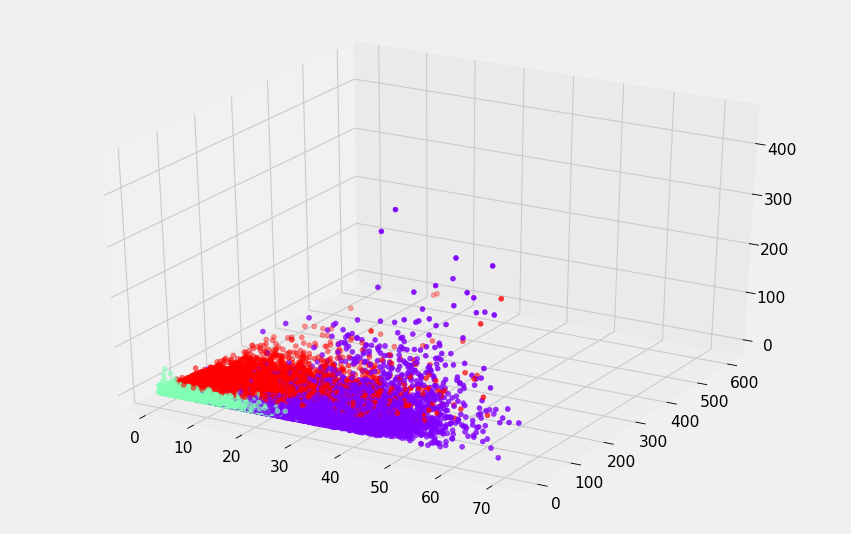

In [34]:
fig = plt.figure(figsize=(12,8), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset['MOBILITY SPEED AVERAGE'], dataset['TRIP LENGTH MINUTES'], dataset['distance'], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [35]:
# from sklearn.metrics import silhouette_score
# # A list holds the silhouette coefficients for each k
# silhouette_coefficients = []

# # Notice you start at 2 clusters for silhouette coefficient
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(dataset[['MOBILITY SPEED AVERAGE', 'distance']])    
#     score = silhouette_score(dataset[['MOBILITY SPEED AVERAGE', 'distance']], kmeans.labels_)
#     silhouette_coefficients.append(score)

In [ ]:
# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()